In [2]:
!pip install mysql-connector-python

In [439]:
import pandas as pd
import numpy as np
import mysql.connector

#connecting directly to the data warehouse where the information is stored
con = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')

In [42]:
cursor = con.cursor()

In [376]:
movie_budget = """SELECT id, release_date, movie, production_budget, domestic_gross, worldwide_gross 
FROM tn_movie_budgets ORDER BY worldwide_gross DESC; """

In [44]:
cursor.execute(test)
cursor.fetchmany(2)

[(95, 'Dec 31, 2020', 'Moonfall', '$150,000,000', '$0', '$0'),
 (80, 'Dec 13, 2017', 'Bright', '$90,000,000', '$0', '$0')]

In [377]:
df = pd.read_sql_query(movie_budget, con)
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,38,"Aug 21, 2009",Fifty Dead Men Walking,"$10,000,000",$0,"$997,921"
1,33,"Sep 30, 2005",Duma,"$12,000,000","$870,067","$994,790"
2,63,"Apr 1, 2011",Insidious,"$1,500,000","$54,009,150","$99,870,886"
3,84,"Apr 2, 2004",Hellboy,"$60,000,000","$59,623,958","$99,823,958"
4,14,"Mar 21, 1980",Mad Max,"$200,000","$8,750,000","$99,750,000"


In [378]:
df.shape

(5782, 6)

In [379]:
# cleaning production budget into integers
df['production_budget'] = df['production_budget'].astype(str)
df['production_budget'] = df['production_budget'].str.replace(',', '')
df['production_budget'] = df['production_budget'].str.replace('$', '')
df['production_budget'] = df['production_budget'].astype(float)

In [381]:
# cleaning domestic gross into integers
df['domestic_gross'] = df['domestic_gross'].astype(str)
df['domestic_gross'] = df['domestic_gross'].str.replace(',', '')
df['domestic_gross'] = df['domestic_gross'].str.replace('$', '')
df['domestic_gross'] = df['domestic_gross'].astype(float)

In [382]:
# cleaning worldwide gross into integers
df['worldwide_gross'] = df['worldwide_gross'].astype(str)
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '')
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '')
df['worldwide_gross'] = df['worldwide_gross'].astype(float)

In [384]:
#create a new column that calculates MOIC
#MOIC - is a proxy value. worldwide gross does not reflect studio level cash flows
#sort by MOIC

df['MOIC'] = df['worldwide_gross'] / df['production_budget']
df = df.sort_values(by=['MOIC'], ascending = False)

In [385]:
df.sort_values(by='release_date').head()
#pd.to_datetime(MOIC['release_date']).head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,MOIC
5701,60,"Apr 1, 1975",Death Race 2000,300000.0,0.0,0.0,0.000000
5694,21,"Apr 1, 1986",My Beautiful Laundrette,400000.0,0.0,0.0,0.000000
4223,61,"Apr 1, 1988","Bright Lights, Big City",25000000.0,16118077.0,16118077.0,0.644723
1413,70,"Apr 1, 1996",Bang,10000.0,527.0,527.0,0.052700
4242,9,"Apr 1, 2005",Sin City,40000000.0,74103820.0,158527918.0,3.963198


In [395]:
#convert date formats
pd.to_datetime(df['release_date']).head(1)

1789   1972-06-30
Name: release_date, dtype: datetime64[ns]

In [396]:
#save changes to date formats.
df['release_date'] = pd.to_datetime(df['release_date'])

In [397]:
#verify formats are reflected accurately
df.sort_values(by = ['release_date'], ascending = False).head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,MOIC
5415,95,2020-12-31,Moonfall,150000000.0,0.0,0.0,0.0
5423,6,2020-12-31,Hannibal the Conqueror,50000000.0,0.0,0.0,0.0


In [398]:
#create additional date variables
df['release_month'] = df['release_date'].apply(lambda x: x.month)
df['release_day'] = df['release_date'].apply(lambda x: x.weekday())
df['release_year'] = df['release_date'].apply(lambda x: x.year)

In [451]:
df.sort_values(by=['release_year'], ascending = True).head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,MOIC,release_month,release_day,release_year
4955,78,1915-02-08,The Birth of a Nation,110000.0,10000000.0,11000000.0,100.0,2,0,1915
540,15,1916-12-24,"20,000 Leagues Under the Sea",200000.0,8000000.0,8000000.0,40.0,12,6,1916


In [452]:
df.shape

(5782, 10)

In [434]:
# Grab monthly movie count per month
month_counts = df.release_month.value_counts().append(
    pd.Series(df.shape[0], index=['Total']))

# Turns counts into a df and adds a column title
month_df = month_counts.to_frame()
month_df.columns = ['count']
month_df.index.name = 'release_month'

In [433]:
#drop total from dataframe
month_counts_bar = month_df.drop(index="Total", axis=0)

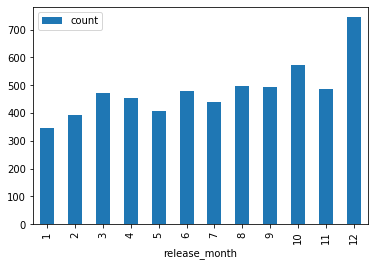

In [432]:
#new releases by month
month_counts_bar.sort_index(inplace=True)
month_counts_bar.plot.bar()

In [404]:
# Run this cell without changes

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

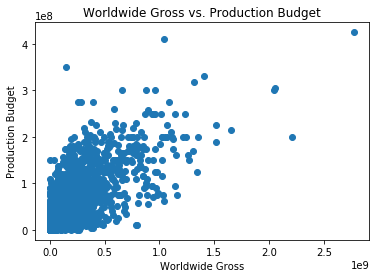

In [187]:
# Chart plots Worldwide Gross vs. Production Budget.  The chart indicates a positive correlation of little significance.

fig, ax = plt.subplots()

ax.set_title('Worldwide Gross vs. Production Budget')
ax.set_xlabel('Worldwide Gross')
ax.set_ylabel('Production Budget')

x = df['worldwide_gross']
y = df['production_budget']

ax.scatter(x, y)

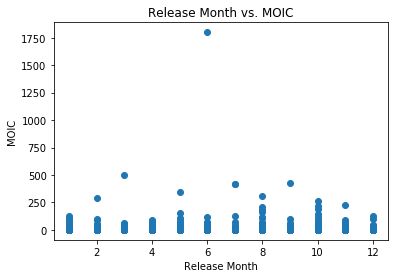

In [402]:
fig, ax = plt.subplots()

ax.set_title('Release Month vs. MOIC')
ax.set_xlabel('Release Month')
ax.set_ylabel('MOIC')

x = df['release_month']
y = df['MOIC']

ax.scatter(x, y)

In [194]:
movie_with_highest_MOIC.index

Float64Index([0.0, 6.0, 9.0, 3.6, 7.166666666666667], dtype='float64')

In [201]:
title_crew = """SELECT tconst, directors, writers FROM imdb_title_crew; """

In [443]:
#pull data on crew by title
df_crew = pd.read_sql_query(title_crew, con)
df_crew.head(2)

,tconst,directors,writers
0,tt0063540,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
1,tt0066787,nm0002411,None


In [442]:
df_crew.sort_values(by=['directors'], ascending=False).head(2)

,tconst,directors,writers
2920,tt10299418,nm9993573,nm9993573
136848,tt8743182,"nm9993380,nm9993379,nm9993381","nm9993380,nm9993379"


In [226]:
name_basics = """SELECT nconst, primary_name, birth_year, death_year, primary_profession, known_for_titles FROM imdb_name_basics; """

In [440]:
#pull data on names of crew members by id#
df_names = pd.read_sql_query(name_basics, con)
df_names.head(2)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
1,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"


In [437]:
df_names.sort_values(by=['nconst'], ascending=False).head(2)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
606647,nm9993680,Christopher-Lawson Palmer,NaN,NaN,actor,tt8295580
606646,nm9993650,Marcin Balcerak,NaN,NaN,actor,tt8739208


In [221]:
#merge data on crew by title / names tied to id#
director_df = pd.merge(df_crew,
                       df_names, 
                       left_on = ['directors'],
                       right_on = ['nconst'],
                       )
director_df.head()

,tconst,directors,writers,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0063540,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer","tt0266757,tt0266712,tt0134996,tt0266765"
1,tt0066787,nm0002411,None,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor","tt0102515,tt0070009,tt0066514,tt0207626"
2,tt0069049,nm0000080,"nm0000080,nm0462648",nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer","tt0048393,tt0052311,tt0057427,tt0033467"
3,tt0069204,nm0611531,nm0347899,nm0611531,Hrishikesh Mukherjee,1922.0,2006.0,"director,editor,writer","tt0066763,tt0147855,tt0137362,tt0137361"
4,tt0111414,nm0398271,nm0398271,nm0398271,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"


In [232]:
title_basics = """SELECT tconst, primary_title, original_title, start_year, genres FROM imdb_title_basics; """

In [436]:
#pull data that identifies movie title by film id#
df_title = pd.read_sql_query(title_basics, con)
df_title.head()

,tconst,primary_title,original_title,start_year,genres
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"


In [241]:
df_title.shape

(146144, 5)

In [237]:
#merge dataframe of director information and dataframe of movie titles using tconst as key
df_director_plus = pd.merge(director_df,
                       df_title, 
                       left_on = ['tconst'],
                       right_on = ['tconst'],
                       )
df_director_plus.head()

,tconst,directors,writers,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,primary_title,original_title,start_year,genres
0,tt0063540,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer","tt0266757,tt0266712,tt0134996,tt0266765",Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,nm0002411,None,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor","tt0102515,tt0070009,tt0066514,tt0207626",One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,tt0069049,nm0000080,"nm0000080,nm0462648",nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer","tt0048393,tt0052311,tt0057427,tt0033467",The Other Side of the Wind,The Other Side of the Wind,2018,Drama
3,tt0069204,nm0611531,nm0347899,nm0611531,Hrishikesh Mukherjee,1922.0,2006.0,"director,editor,writer","tt0066763,tt0147855,tt0137362,tt0137361",Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0111414,nm0398271,nm0398271,nm0398271,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414",A Thin Life,A Thin Life,2018,Comedy


In [244]:
df_director_plus.shape

(124689, 13)

In [246]:
df_budget_director = pd.merge(df_MOIC,
                       df_director_plus, 
                       left_on = ['movie'],
                       right_on = ['original_title'],
                       )
df_budget_director.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,MOIC,tconst,directors,writers,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,primary_title,original_title,start_year,genres
0,47,"Aug 13, 1942",Bambi,858000.0,102797000.0,268000000.0,312.354312,tt2668120,nm0509852,nm0509852,nm0509852,Sébastien Lifshitz,1968.0,NaN,"director,writer,actor","tt0156427,tt0364120,tt2668120,tt2399533",Bambi,Bambi,2013,"Biography,Documentary"
1,77,"Oct 1, 1968",Night of the Living Dead,114000.0,12087064.0,30087064.0,263.921614,tt3393372,nm5209991,nm5209991,nm5209991,Chad Zuver,NaN,NaN,"producer,actor,writer","tt2645542,tt3645918,tt3393372,tt2666286",Night of the Living Dead,Night of the Living Dead,2014,Horror
2,69,"Oct 19, 1990",Night of the Living Dead,4200000.0,5835247.0,5835247.0,1.389345,tt3393372,nm5209991,nm5209991,nm5209991,Chad Zuver,NaN,NaN,"producer,actor,writer","tt2645542,tt3645918,tt3393372,tt2666286",Night of the Living Dead,Night of the Living Dead,2014,Horror
3,11,"Nov 21, 1976",Rocky,1000000.0,117235147.0,225000000.0,225.000000,tt3080284,nm1126847,None,nm1126847,Sujit Mondal,NaN,NaN,"assistant_director,director,writer","tt0247911,tt3080284,tt4773064,tt1443519",Rocky,Rocky,2013,"Action,Comedy,Drama"
4,11,"Nov 21, 1976",Rocky,1000000.0,117235147.0,225000000.0,225.000000,tt9430578,nm9645626,"nm3358805,nm7633074,nm9645626",nm9645626,Adnan A. Shaikh,NaN,NaN,"director,writer,assistant_director","tt9430578,tt6843812",Rocky,Rocky,2019,"Action,Drama,Romance"


In [248]:
df_budget_director.shape

(3128, 20)

In [252]:
df_MOIC_sort = df_budget_director.sort_values(by=['MOIC'], ascending = False)
df_MOIC_sort.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,MOIC,tconst,directors,writers,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,primary_title,original_title,start_year,genres
0,47,"Aug 13, 1942",Bambi,858000.0,102797000.0,268000000.0,312.354312,tt2668120,nm0509852,nm0509852,nm0509852,Sébastien Lifshitz,1968.0,NaN,"director,writer,actor","tt0156427,tt0364120,tt2668120,tt2399533",Bambi,Bambi,2013,"Biography,Documentary"
1,77,"Oct 1, 1968",Night of the Living Dead,114000.0,12087064.0,30087064.0,263.921614,tt3393372,nm5209991,nm5209991,nm5209991,Chad Zuver,NaN,NaN,"producer,actor,writer","tt2645542,tt3645918,tt3393372,tt2666286",Night of the Living Dead,Night of the Living Dead,2014,Horror
3,11,"Nov 21, 1976",Rocky,1000000.0,117235147.0,225000000.0,225.000000,tt3080284,nm1126847,None,nm1126847,Sujit Mondal,NaN,NaN,"assistant_director,director,writer","tt0247911,tt3080284,tt4773064,tt1443519",Rocky,Rocky,2013,"Action,Comedy,Drama"
4,11,"Nov 21, 1976",Rocky,1000000.0,117235147.0,225000000.0,225.000000,tt9430578,nm9645626,"nm3358805,nm7633074,nm9645626",nm9645626,Adnan A. Shaikh,NaN,NaN,"director,writer,assistant_director","tt9430578,tt6843812",Rocky,Rocky,2019,"Action,Drama,Romance"
5,37,"Oct 17, 1978",Halloween,325000.0,47000000.0,70000000.0,215.384615,tt1502407,nm0337773,"nm0000118,nm0384185,nm2171769,nm1144419,nm0337773",nm0337773,David Gordon Green,1975.0,NaN,"producer,director,writer","tt2195548,tt2382396,tt0262432,tt1502407",Halloween,Halloween,2018,"Horror,Thriller"


In [260]:
df_date_sort = df_budget_director.sort_values(by=['release_date'], ascending = True)
df_date_sort.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,MOIC,tconst,directors,writers,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,primary_title,original_title,start_year,genres
727,72,"Apr 1, 2010",Clash of the Titans,125000000.0,163214888.0,493214888.0,3.945719,tt0800320,nm0504642,"nm2012438,nm0006534,nm0542062,nm0189117",nm0504642,Louis Leterrier,1973.0,NaN,"director,producer,actor","tt1670345,tt3381008,tt0293662,tt0800080",Clash of the Titans,Clash of the Titans,2010,"Action,Adventure,Fantasy"
1693,55,"Apr 1, 2011",Rubber,500000.0,100370.0,680914.0,1.361828,tt1612774,nm1189197,nm1189197,nm1189197,Quentin Dupieux,NaN,NaN,"director,writer,cinematographer","tt2392672,tt7156222,tt1612774,tt1901040",Rubber,Rubber,2010,"Comedy,Fantasy,Horror"
2696,43,"Apr 1, 2011",Trust,4000000.0,120016.0,120016.0,0.030004,tt8267382,nm4399741,nm4399741,nm4399741,Frank Blenman,NaN,NaN,"cinematographer,producer,editor","tt3178992,tt4491578,tt2418056,tt8267382",Trust,Trust,2018,Drama
2695,43,"Apr 1, 2011",Trust,4000000.0,120016.0,120016.0,0.030004,tt5541186,nm0071003,nm0071003,nm0071003,Angus Benfield,NaN,NaN,"actor,producer,writer","tt1151002,tt1592531,tt3406690,tt0110337",Trust,Trust,2018,Drama
2694,43,"Apr 1, 2011",Trust,4000000.0,120016.0,120016.0,0.030004,tt4569764,nm6945434,"nm7123519,nm6945434",nm6945434,Parker Olson,NaN,NaN,"actor,writer,director","tt4707256,tt4569764,tt4238548,tt4441222",Trust,Trust,2015,"Drama,Mystery"


In [262]:
df['release_date'].dtype

dtype('O')

In [269]:
#converts data type from non-null object to datetime
pd.to_datetime(df_date_sort['release_date']).head()

727    2010-04-01
1693   2011-04-01
2696   2011-04-01
2695   2011-04-01
2694   2011-04-01
Name: release_date, dtype: datetime64[ns]

In [271]:
#actually apply and save our changes
df_date_sort['release_date'] = pd.to_datetime(df_date_sort['release_date'])
print(df_date_sort['release_date'].dtype)
#preview updated dataframe
df_date_sort.head(2)

datetime64[ns]


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,MOIC,tconst,directors,writers,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,primary_title,original_title,start_year,genres
727,72,2010-04-01,Clash of the Titans,125000000.0,163214888.0,493214888.0,3.945719,tt0800320,nm0504642,"nm2012438,nm0006534,nm0542062,nm0189117",nm0504642,Louis Leterrier,1973.0,NaN,"director,producer,actor","tt1670345,tt3381008,tt0293662,tt0800080",Clash of the Titans,Clash of the Titans,2010,"Action,Adventure,Fantasy"
1693,55,2011-04-01,Rubber,500000.0,100370.0,680914.0,1.361828,tt1612774,nm1189197,nm1189197,nm1189197,Quentin Dupieux,NaN,NaN,"director,writer,cinematographer","tt2392672,tt7156222,tt1612774,tt1901040",Rubber,Rubber,2010,"Comedy,Fantasy,Horror"


In [283]:
df_date_sort.sort_values(by=['release_date'], ascending = False).head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,MOIC,tconst,directors,writers,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,primary_title,original_title,start_year,genres
3037,36,2020-02-21,Call of the Wild,82000000.0,0.0,0.0,0.0,tt7504726,nm0761498,"nm0338169,nm0518711",nm0761498,Chris Sanders,1962.0,NaN,"writer,actor,animation_department","tt0120762,tt0892769,tt0275847,tt0481499",Call of the Wild,Call of the Wild,2020,"Adventure,Animation,Family"
3059,30,2019-12-31,Reagan,25000000.0,0.0,0.0,0.0,tt1822382,nm0418659,nm0418659,nm0418659,Eugene Jarecki,NaN,NaN,"director,producer,writer","tt1822382,tt6775942,tt0436971,tt0326306",Reagan,Reagan,2011,"Biography,Documentary"
3025,16,2019-12-31,Eli,11000000.0,0.0,0.0,0.0,tt4786638,nm6405547,nm6405547,nm6405547,Yuvaraj Dhayalan,NaN,NaN,"director,writer","tt4786638,tt3646264,tt4339030",Eli,Eli,2015,Comedy
3024,16,2019-12-31,Eli,11000000.0,0.0,0.0,0.0,tt5294518,nm1164602,"nm3616958,nm1968372,nm3915456",nm1164602,Ciarán Foy,NaN,NaN,"director,writer,editor","tt2752772,tt1641975,tt0841102,tt4960780",Eli,Eli,2019,Horror
3042,13,2019-12-31,Rogue City,13000000.0,0.0,0.0,0.0,tt10329540,nm0545356,None,nm0545356,Olivier Marchal,1958.0,NaN,"actor,writer,director","tt1099219,tt10127684,tt0362225,tt0390808",Rogue City,Rogue City,2020,


In [287]:
df_release_date_index = df_date_sort.set_index(['release_date']).head()
df_release_date_index

,id,movie,production_budget,domestic_gross,worldwide_gross,MOIC,tconst,directors,writers,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,primary_title,original_title,start_year,genres
release_date,,,,,,,,,,,,,,,,,,,
2010-04-01,72,Clash of the Titans,125000000.0,163214888.0,493214888.0,3.945719,tt0800320,nm0504642,"nm2012438,nm0006534,nm0542062,nm0189117",nm0504642,Louis Leterrier,1973.0,NaN,"director,producer,actor","tt1670345,tt3381008,tt0293662,tt0800080",Clash of the Titans,Clash of the Titans,2010,"Action,Adventure,Fantasy"
2011-04-01,55,Rubber,500000.0,100370.0,680914.0,1.361828,tt1612774,nm1189197,nm1189197,nm1189197,Quentin Dupieux,NaN,NaN,"director,writer,cinematographer","tt2392672,tt7156222,tt1612774,tt1901040",Rubber,Rubber,2010,"Comedy,Fantasy,Horror"
2011-04-01,43,Trust,4000000.0,120016.0,120016.0,0.030004,tt8267382,nm4399741,nm4399741,nm4399741,Frank Blenman,NaN,NaN,"cinematographer,producer,editor","tt3178992,tt4491578,tt2418056,tt8267382",Trust,Trust,2018,Drama
2011-04-01,43,Trust,4000000.0,120016.0,120016.0,0.030004,tt5541186,nm0071003,nm0071003,nm0071003,Angus Benfield,NaN,NaN,"actor,producer,writer","tt1151002,tt1592531,tt3406690,tt0110337",Trust,Trust,2018,Drama
2011-04-01,43,Trust,4000000.0,120016.0,120016.0,0.030004,tt4569764,nm6945434,"nm7123519,nm6945434",nm6945434,Parker Olson,NaN,NaN,"actor,writer,director","tt4707256,tt4569764,tt4238548,tt4441222",Trust,Trust,2015,"Drama,Mystery"


In [468]:
df_release_date_index = df_date_sort.sort_values(by=['release_date'], ascending = False)
df_release_date_index.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,MOIC,tconst,directors,writers,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,primary_title,original_title,start_year,genres
3037,36,2020-02-21,Call of the Wild,82000000.0,0.0,0.0,0.0,tt7504726,nm0761498,"nm0338169,nm0518711",nm0761498,Chris Sanders,1962.0,NaN,"writer,actor,animation_department","tt0120762,tt0892769,tt0275847,tt0481499",Call of the Wild,Call of the Wild,2020,"Adventure,Animation,Family"
3059,30,2019-12-31,Reagan,25000000.0,0.0,0.0,0.0,tt1822382,nm0418659,nm0418659,nm0418659,Eugene Jarecki,NaN,NaN,"director,producer,writer","tt1822382,tt6775942,tt0436971,tt0326306",Reagan,Reagan,2011,"Biography,Documentary"


In [467]:
df_sort_MOIC_2 = df_slim1.sort_values(by='MOIC', ascending = False)
df_sort_MOIC_2.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,MOIC,tconst,directors,writers,nconst,primary_name,primary_profession,known_for_titles,primary_title,original_title,genres
0,1942-08-13,Bambi,858000.0,102797000.0,268000000.0,312.354312,tt2668120,nm0509852,nm0509852,nm0509852,Sébastien Lifshitz,"director,writer,actor","tt0156427,tt0364120,tt2668120,tt2399533",Bambi,Bambi,"Biography,Documentary"
1,1968-10-01,Night of the Living Dead,114000.0,12087064.0,30087064.0,263.921614,tt3393372,nm5209991,nm5209991,nm5209991,Chad Zuver,"producer,actor,writer","tt2645542,tt3645918,tt3393372,tt2666286",Night of the Living Dead,Night of the Living Dead,Horror


In [508]:
#filter for movies made after Jan 1 2013
netflix_era = '2013-01-01'
mask = (df_sort_MOIC_2['release_date'] > netflix_era)
df_1 = df_sort_MOIC_2.loc[mask]
df_1.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,MOIC,tconst,directors,writers,nconst,primary_name,primary_profession,known_for_titles,primary_title,original_title,genres
76,2015-04-17,Unfriended,1000000.0,32789645.0,64364198.0,64.364198,tt3713166,nm0300174,nm4532532,nm0300174,Levan Gabriadze,"director,actor,camera_department","tt0091341,tt1682187,tt3713166,tt7526492",Unfriended,Unfriended,"Horror,Mystery,Thriller"
82,2017-01-20,Split,5000000.0,138141585.0,278964806.0,55.792961,tt3315656,nm1380487,nm1380487,nm1380487,Deborah Kampmeier,"writer,director,producer","tt3315656,tt0415856,tt0368411",Split,Split,"Drama,Fantasy"


In [512]:
#plot figure to show top 10 directors by MOIC since 2013
director_counts = df_1['primary_name'].value_counts()
director_list = director_counts[director_counts>2].index.tolist()
df_2 = df_1[df_1['primary_name'].isin(director_list)]
df_2.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,MOIC,tconst,directors,writers,nconst,primary_name,primary_profession,known_for_titles,primary_title,original_title,genres
79,2017-01-20,Split,5000000.0,138141585.0,278964806.0,55.792961,tt4972582,nm0796117,nm0796117,nm0796117,M. Night Shyamalan,"producer,writer,director","tt0452637,tt0368447,tt0286106,tt0167404",Split,Split,"Horror,Thriller"
106,2013-06-07,The Purge,3000000.0,64473115.0,91266581.0,30.422194,tt2184339,nm0218621,nm0218621,nm0218621,James DeMonaco,"writer,producer,director","tt2184339,tt2975578,tt6133466,tt4094724",The Purge,The Purge,"Horror,Thriller"
109,2016-07-22,Lights Out,5000000.0,67268835.0,148806510.0,29.761302,tt4786282,nm2497546,"nm2104063,nm2497546",nm2497546,David F. Sandberg,"director,composer,writer","tt5140878,tt0932674,tt4786282,tt3605002",Lights Out,Lights Out,"Drama,Horror,Mystery"
6,2018-10-19,Halloween,10000000.0,159342015.0,254900667.0,25.490067,tt1502407,nm0337773,"nm0000118,nm0384185,nm2171769,nm1144419,nm0337773",nm0337773,David Gordon Green,"producer,director,writer","tt2195548,tt2382396,tt0262432,tt1502407",Halloween,Halloween,"Horror,Thriller"
126,2017-10-13,Happy Death Day,5000000.0,55683845.0,125010260.0,25.002052,tt5308322,nm0484907,nm1245146,nm0484907,Christopher Landon,"writer,producer,director","tt2473682,tt0486822,tt1727776,tt1778304",Happy Death Day,Happy Death Day,"Horror,Mystery,Thriller"


In [518]:
director_moic = df_2.groupby(by='primary_name').mean()['MOIC']

In [544]:
director_valuecounts = df_2.primary_name.value_counts()

In [555]:
director_df = pd.merge(director_valuecounts, director_moic, left_index=True, right_index=True)
director_df = director_df.rename(columns={'primary_name':'Movies_Directed'})

In [568]:
director_moic_rank = director_df.sort_values(by='MOIC', ascending = True)

In [571]:
director_moic_top10 = director_moic_rank.tail(10)
director_moic_top10 

,Movies_Directed,MOIC
Bryan Singer,4,6.018380
David Gordon Green,4,6.518915
Wes Ball,3,6.564872
Ryan Coogler,3,10.310637
Michael Tiddes,3,11.231118
Damien Chazelle,3,11.626585
Christopher Landon,4,12.837767
David F. Sandberg,3,18.129901
James DeMonaco,3,18.222144
M. Night Shyamalan,4,22.432078


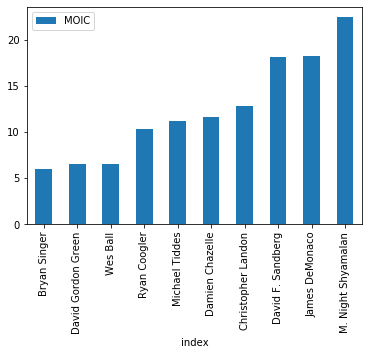

In [572]:
director_moic_top10.reset_index().plot.bar(x='index',y='MOIC')

In [532]:
genres_moic = df_2.groupby(by='genres').mean()['MOIC']

In [534]:
genres_valuecounts = df_2.genres.value_counts()

In [539]:
genres_df = pd.merge(genres_valuecounts, genres_moic, left_index=True, right_index=True)

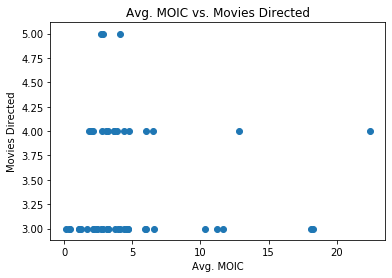

In [556]:
# Chart plots Avg. MOIC vs. Movies Directed.

fig, ax = plt.subplots()

ax.set_title('Avg. MOIC vs. Movies Directed')
ax.set_xlabel('Avg. MOIC')
ax.set_ylabel('Movies Directed')

x = director_df['MOIC']
y = director_df['Movies_Directed']

ax.scatter(x, y)

In [494]:
df_2 = df_1_directors.iloc[:, :]
df_2

,,,,,,domestic_gross,worldwide_gross,tconst,directors,writers,nconst,primary_profession,known_for_titles,primary_title,original_title
primary_name,movie,release_date,production_budget,MOIC,genres,,,,,,,,,,
Levan Gabriadze,Unfriended,2015-04-17,1000000.0,64.364198,"Horror,Mystery,Thriller",32789645.0,64364198.0,tt3713166,nm0300174,nm4532532,nm0300174,"director,actor,camera_department","tt0091341,tt1682187,tt3713166,tt7526492",Unfriended,Unfriended
Deborah Kampmeier,Split,2017-01-20,5000000.0,55.792961,"Drama,Fantasy",138141585.0,278964806.0,tt3315656,nm1380487,nm1380487,nm1380487,"writer,director,producer","tt3315656,tt0415856,tt0368411",Split,Split
M. Night Shyamalan,Split,2017-01-20,5000000.0,55.792961,"Horror,Thriller",138141585.0,278964806.0,tt4972582,nm0796117,nm0796117,nm0796117,"producer,writer,director","tt0452637,tt0368447,tt0286106,tt0167404",Split,Split
Robbie Walsh,Split,2017-01-20,5000000.0,55.792961,Crime,138141585.0,278964806.0,tt3604256,nm3334461,nm3334461,nm3334461,"actor,producer,writer","tt6072652,tt1836174,tt3604256,tt2132321",Split,Split
Jamie Buckner,Split,2017-01-20,5000000.0,55.792961,"Comedy,Romance,Sport",138141585.0,278964806.0,tt2660118,nm1406121,nm1406121,nm1406121,"miscellaneous,production_manager,producer","tt3316948,tt1219289,tt1409024,tt0407304",Split,Split
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Katie Aselton,Black Rock,2013-05-14,1000000.0,0.000000,"Horror,Thriller",0.0,0.0,tt1930294,nm1051221,"nm0243233,nm1051221",nm1051221,"actress,producer,director","tt1930294,tt4178092,tt5114356,tt1474889",Black Rock,Black Rock
Deborah Anderson,Aroused,2013-05-03,150000.0,0.000000,Documentary,0.0,0.0,tt2403815,nm2935964,None,nm2935964,"director,editor,producer","tt0363307,tt2403815",Aroused,Aroused
James Cox,Straight A's,2013-03-19,2000000.0,0.000000,"Comedy,Drama",0.0,0.0,tt2024506,nm0185063,nm1023712,nm0185063,"director,writer,actor","tt0177176,tt0179091,tt0335563,tt5179598",Straight A's,Straight A's
